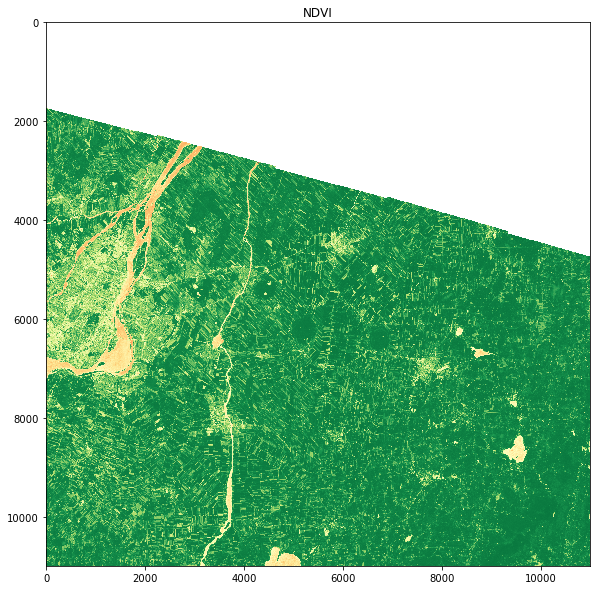

In [6]:
# Import all the stuff that you'll need for this. It's really only two things the gdal
# and the matplotlib but I have a habit of always importing sys and/or os and numpy
# even if I don't need to do so.

from osgeo import gdal
from matplotlib import pyplot as plt
import sys
import numpy as np

# Open up your two .tif files you'll need to do the calculation
b8a = gdal.Open('D:\\Sen2\\20170730\\RT_T18TXR_20170730T154909_B8A.tif')
b4 = gdal.Open('D:\\Sen2\\20170730\\RT_T18TXR_20170730T154909_B4.tif')

# Just in case you somehow have a bad file you should always check to make sure the file
# was opened properly. Then it's time to grab the band from each .tif file.
d8a = b8a.GetRasterBand(1)
d4 = b4.GetRasterBand(1)

# Then we need to make it readable so we'll input the data as an array.
img_8a = d8a.ReadAsArray()
img_4 = d4.ReadAsArray()

# Next is the calculation remember [(NIR-RED)/(NIR+RED)]
ndvi = (img_8a - img_4) / (img_8a + img_4)

# Finally we'll set up the plot and graph the data to the screen.
# This is the full image
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(ndvi, cmap='RdYlGn') # Typically the color map for NDVI maps are the Red to Yellow to Green
plt.title('NDVI')
plt.show()

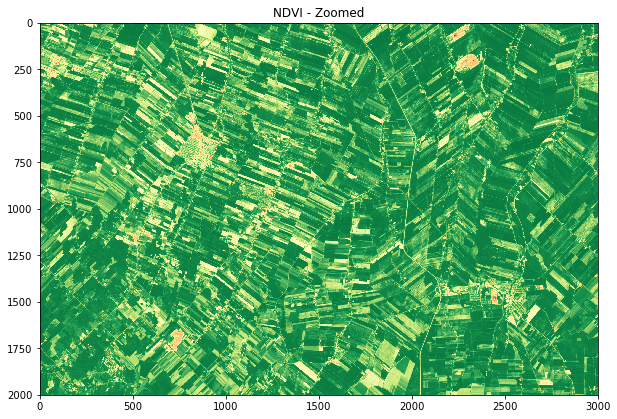

In [9]:
# But what if I want to zoom in on a specific area?
# I can do so by adjusting what part of the array is plotted
# as you'll see below in the plt.imshow line. Compare it to the one
# from the previous image. You can adjust the range to specify the
# amount that it is zoomed in. Remember that the ndvi array is [y,x]
# and not [x,y] like we might normally think.

# This is the zoomed in image
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
plt.imshow(ndvi[8000:10000, 0:3000], cmap='RdYlGn')
plt.title('NDVI - Zoomed')
plt.show()